# CS3244 Group Project

# Preparation of the dataset:
## Steps Required:
  1. Import all the necessary Python libraries (numpy, pandas, matplotlib, seaborn).
  2. Import the Guns Incident CSV File from Google Drive.
  3. Observe the features and target of the Guns Incident Dataset.

In [ ]:
# Step 1: Importing all the relevant libraries for the Machine Learning Project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [ ]:
# Step 2: Importing the Guns Incident CSV File from Google Drive

from google.colab import drive
drive.mount('/content/drive')

data = '/content/drive/MyDrive/CS3244 Gun Incidence/Guns incident Data.csv'
df = pd.read_csv(data)

In [ ]:
# Step 3: Observe the features and target of the Guns Incident Dataset

# Observing the shape of the dataset (number of rows and columns of dataset)
print(df.shape)

# Observing the first few rows of the dataset and its contents
df.head()

After printing the shape of the dataset, we observed that the dataset contains 100798 rows and 12 columns before the cleaning process. The 12 columns include S.No., Year, Month, Date, Reason, Education, Sex, Age, Race, Hispanic, Place of incident and Police involvement.

# Data Cleaning
  ## Steps Required
  1. Check that the data types of all the columns are correct.
  2. Dealing with missing/NA values present in the dataset.
  3. Check for any duplicates and remove them accordingly.
  4. Remove irrelevant features/columns from dataset that do not contribute to the outcome.

In [ ]:
# Step 1: Check if all the columns of dataset have the right datatype

df.dtypes.rename("Data Type").reset_index()

When the column data types of the dataset are observed, it seems that for the 'Date' column, the Data Type is 'object', which is not correct. We need to set the Data Type of the 'Date' column to a 'datetime' Data Type instead. For the remaining columns of the dataset, the datatypes are either correct or plausible.

In [ ]:
# Convert the 'Date' column to a 'datetime' Data Type

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df.dtypes.rename("Data Type").reset_index()

In [ ]:
# Step 2: Dealing with missing/NA values in the dataset

df.isna().sum().rename("Number of NAs").reset_index()

Upon calculating the total number of NA values for each column of the dataset, we observe that there are 1422 NAs for education, 18 NAs for Age and 1384 NAs for Place of incident. The rest of the columns do not have any NA values.

Replacing the NA values with the mode/mean/median might affect the accuracy and results of the Machine Learning algorithms implemented subsequently, hence imputation might not be a suitable option to replace the NA values. Additionally, we have more than 100000 rows of data, implying that we have sufficent data for training, validation and testing. Hence, the best approach is to simply remove the data rows containing NA values from the dataset.

In [ ]:
# Remove all the NA values from the dataset
df.dropna(inplace = True)

# Observe the modified shape of the dataset
print(df.shape)

The dataset now contains 98015 rows instead of the initial 100798 rows, suggesting that we have successfully removed all the rows containing NA values. There are 100798 - 98015 = 2783 rows that contain at least one NA value.

In [ ]:
# Step 3: Check for any duplicates in the dataset

# First, we need to remove the S.No. column as S.No. is unique for all data rows
df.drop(columns = ['S.No.'], inplace = True)

# Check the total number of duplicates in the dataset
number_duplicates = df.duplicated().sum()
print(f'No. of duplicate rows: {number_duplicates}')

We observed that there are 3096 duplicate rows in the dataset. highlighting that we need to remove these duplicate rows before analysis as duplicate entries will also affect the results of the Machine Learning Algorithm.

In [ ]:
# Drop the duplicates in the dataset
df.drop_duplicates(inplace = True)

# Observe the modified shape of the dataset
df.shape

After printing out the shape of the dataset, there are 94919 rows left. This shows that all the duplicated rows of the dataset are removed as well. 98015 - 94919 = 3096 duplicated rows are removed, which tallies with our initial observation.

In [ ]:
# Step 4: Removing all the irrelevent features/columns from the dataset

# Remove Year and Month columns as the same information is found in the Date column
df.drop(columns=['Year', 'Month'], inplace = True)

# Remove Hispanic column as it does not make any sense having random values
df.drop(columns=['Hispanic'], inplace = True)

For the irrelevent features/columns of the dataset, first we removed the Year and Month columns as the year and month information is already reflected in the Date column of the dataset, suggesting that the Year and Month columns are duplicates of the Date columns and should be removed. We also removed the Hispanic column as we do not know what the values of Hispanic (eg. 100, 701) are referring to and it does not make any sense for Hispanic to have a certain numerical value that is not boolean-related. To prevent confusion, we dropped the Hispanic column as well.

In [ ]:
print(df['Police involvement'].value_counts())

# since police involvement feature is highly imbalanced, might remove as well???/

In [ ]:
# Printing the final cleaned dataset for checking

df.head(n = 10)

# Visualising The Dataset Features And Outcome (Explanatory Data Analysis)
  Used matplotlib and seaborn libraries to visualise the dataset features and outcome through diagrams such as bar charts.

## Diagram 1: Visualising the distribution of the target variable, 'Reason'.

In [ ]:
# Analysing the distribution of the target variable, 'Reason', using a bar chart.
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', data=df)
plt.title('Distribution of Reason')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

From the bar chart plotted, we observe that Suicide and Homicide contribute to a large proportion of deaths (around 60000 for Suicide and more than 30000 for Homicide). However, Undetermined and Accidental contribute to very few cases of death (less than 2000 each for both categories). Hence, we combined Undertermined and Accidental categories into a broader category called Others.

In [ ]:
# Combining Undetermined and Accidental categories into Others
df['Reason'] = df['Reason'].replace(['Accidental', 'Undetermined'], 'Others')

# Plot the new resultant diagram after the new classification
plt.figure(figsize=(9, 6))
bx=sns.countplot(x ='Reason', data = df)
plt.title('Distribution of Reason')
for p in bx.patches:
    bx.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

## Diagram 2: Visualising the distribution of the feature 'Place of incident'.

In [ ]:
# Analysing the distribution of the categorical variable, 'Place of incident', using a bar chart.
plt.figure(figsize=(12, 6))
cx=sns.countplot(x = 'Place of incident', data = df, color = 'orange')
plt.title('Distribution of Place of incident')
plt.xticks(rotation = 90)
for p in cx.patches:
    cx.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

From the bar chart plotted, the known places of incident mostly come from Home and Street. We will classify 'Other specified' and 'Other unspecified' into a category called 'Other Places'. The rest of the categories, including 'Trade/service area', 'Farm', 'Industrial/construction', 'School/institution' and 'Sports', contain few observations and for simplicity, we classify these categories as 'Miscellaneous'.

In [ ]:
# Combining 'Other specified' and 'Other unspecified' into the column 'Other Places'.
df['Place of incident'] = df['Place of incident'].replace(['Other specified', 'Other unspecified'], 'Other Places')

# Combining 'Trade/service area', 'Farm', 'Industrial/construction', 'School/institution' and 'Sports' into the column 'Miscellaneous'.
df['Place of incident'] = df['Place of incident'].replace(['Trade/service area', 'Farm', 'Industrial/construction', 'School/instiution', 'Sports', 'Residential institution'], 'Miscellaneous')

# Plot the new resultant diagram after the new classification
plt.figure(figsize=(9, 6))
ax=sns.countplot(x = 'Place of incident', data = df, color = 'orange')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Place of incident')
plt.show()

## Diagram 3: Visualising the distribution of the feature 'Age'.


In [ ]:
# Analysing the distribution of the numerical variable 'Age' using a histogram
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(df['Age'], bins=20, color='red', edgecolor='black', alpha=0.7)
for count, bin_edge, patch in zip(counts, bins, patches):
    bar_center = patch.get_x() + patch.get_width() / 2
    plt.text(bar_center, count + 2,
             f'{int(count)}',
             ha='center', va='bottom',
             fontsize=10, color='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


From the histogram, we observe that the age ranges from a very small number (close to 0) to a very large number (around 100). Most people have the age range of between 20 and 60. We do not observe any significant skew (left skew/right skew) in the age range.

## Diagram 4: Visualising the distribution of the outcome 'Reason' with respect to the feature 'Place of incident'.

In [ ]:
# Analysing the distribution of the outcome 'Reason' by the feature 'Place of incident' using a countplot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', hue='Place of incident', data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Reason by Place of incident')
plt.show()


From the countplot diagram, we observed that for all the three reasons - 'Suicide', 'Others' and 'Homicide', the place of incident 'Home' contributes the most. Furthermore, the place of incident 'Other Places' contributes the second most for all three reasons as well. For the reason 'Others', 'Street' and 'Miscellaneous' have near zero cases.

## Diagram 5: Visualising the distribution of the outcome 'Reason' with respect to the feature 'Race'.

In [ ]:
# Analysing the distribution of the outcome 'Reason' by the feature 'Race' using a countplot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', hue='Place of incident', data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Reason by Race')

plt.show()

Through the countplot, we observed that for the reason 'Suicide' and 'Others', 'White' race contributes the most while for the reason 'Homicide', 'Black' race contributes the most. Also, races 'Asian/Pacific Islander' and 'Native American/Native Alaskan' contribute insignificantly to all the three reasons.

## Diagram 6: Visualising the distribution of the outcome 'Reason' with respect to the feature 'Education'.

In [ ]:
# Analysing the distribution of the outcome 'Reason' by the feature 'Education' through a countplot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', hue='Place of incident', data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Reason by Education')
plt.show()

Analysing the countplot diagram, we observed that for all three reasons - 'Suicide', 'Others' and 'Homicide', 'High School' contributes the most. 'Some college' contributes more to 'Suicide' while 'Less than High School' contributes more to 'Others' and 'Homicide'. 'Bachelors' contributes significantly less to the 'Others' and 'Homicide'.

# Implementing The Decision Tree Model

## Step 1: Implement the Decision Tree model (without taking into account best parameters)

### Actions Required:
  1. Import the necessary packages (DecisionTreeClassifier, train_test_split, accuracy_score etc.)
  2. **Encoding all the categorical variables** into numeric/integers/floats
  3. Extract the relevant features and target from the dataset (X and y)
  4. Perform train-test-split on the dataset (default 80% train, 20% test)
  5. Implementing the Decision Tree Classifier on the training dataset
  6. Predicting the outcome of the testing dataset (y_pred) from X_test
  7. Gauge the accuracy of the Decision Tree model implemented

### Step 1.1: Import the necessary packages (DecisionTreeClassifier, train_test_split, accuracy_score, LabelEncoder and others involved)

In [ ]:
# Import the necessary packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import time


### Step 1.2: Encoding all categorical variables into numeric/integers/floats
We identified that there are many categorical variables in this dataset, including Education, Sex, Race and Place of incident. The only numeric variables are Age and Police Involvement.

Date is more "problematic" as date is not a category and is continuous. We probably need to extract the year of each date. Based on the dataset, we have incidents from January 2017 to December 2019. Hence, we will have three categories - 2017, 2018 and 2019. We will not take into account the month and day of each incident as this will create too many categories to encode, leading to poorer accuracy in the Decision Tree model.

In fact, if year is taken into account only, we do not need to encode the year as they can be easily converted into numeric data type.


In [ ]:
# Encoding the categorical variables
label_encoder_reason = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_place = LabelEncoder()

# Encode 'Reason' column
df['Reason Encoded'] = label_encoder_reason.fit_transform(df['Reason'])

# Encode 'Education' column
df['Education Encoded'] = label_encoder_education.fit_transform(df['Education'])

# Encode 'Sex' column
df['Sex Encoded'] = label_encoder_sex.fit_transform(df['Sex'])

# Encode 'Race' column
df['Race Encoded'] = label_encoder_race.fit_transform(df['Race'])

# Encode 'Place of incident' column
df['Place Encoded'] = label_encoder_place.fit_transform(df['Place of incident'])

# Extract the relevant columns, dropping the original unencoded categorical columns
df = df[['Date', 'Reason Encoded', 'Education Encoded', 'Sex Encoded', 'Age',
         'Race Encoded', 'Place Encoded', 'Police involvement']]

df.head()

We observe that the new 'Reason Encoded', 'Education Encoded', 'Sex Encoded', 'Race Encoded' and 'Place Encoded' columns are now encoded with numbers, with each category representing a particular number. Age and Police involvement columns do not need any encoding as they are of type float and integer respectively which can work under Decision Tree models. The 'Date' column will be modified in the subsequent steps.  

Now, we need to be aware of all the encoding numbers for each category of each feature as the encoded numbers will be displayed in the Decision Tree diagram subsequently.

In [ ]:
# Finding the classes for each feature
print("Reason classes:", label_encoder_reason.classes_)
print("\nEducation classes:", label_encoder_education.classes_)
print("\nSex classes:", label_encoder_sex.classes_)
print("\nRace classes:", label_encoder_race.classes_)
print("\nPlace classes:", label_encoder_place.classes_)

By default, LabelEncoder assigns encoding numbers in alphabetical order for string values. The categories are sorted alphabetically, and then they are assigned integer values starting from 0. The encoded categories are as follows:

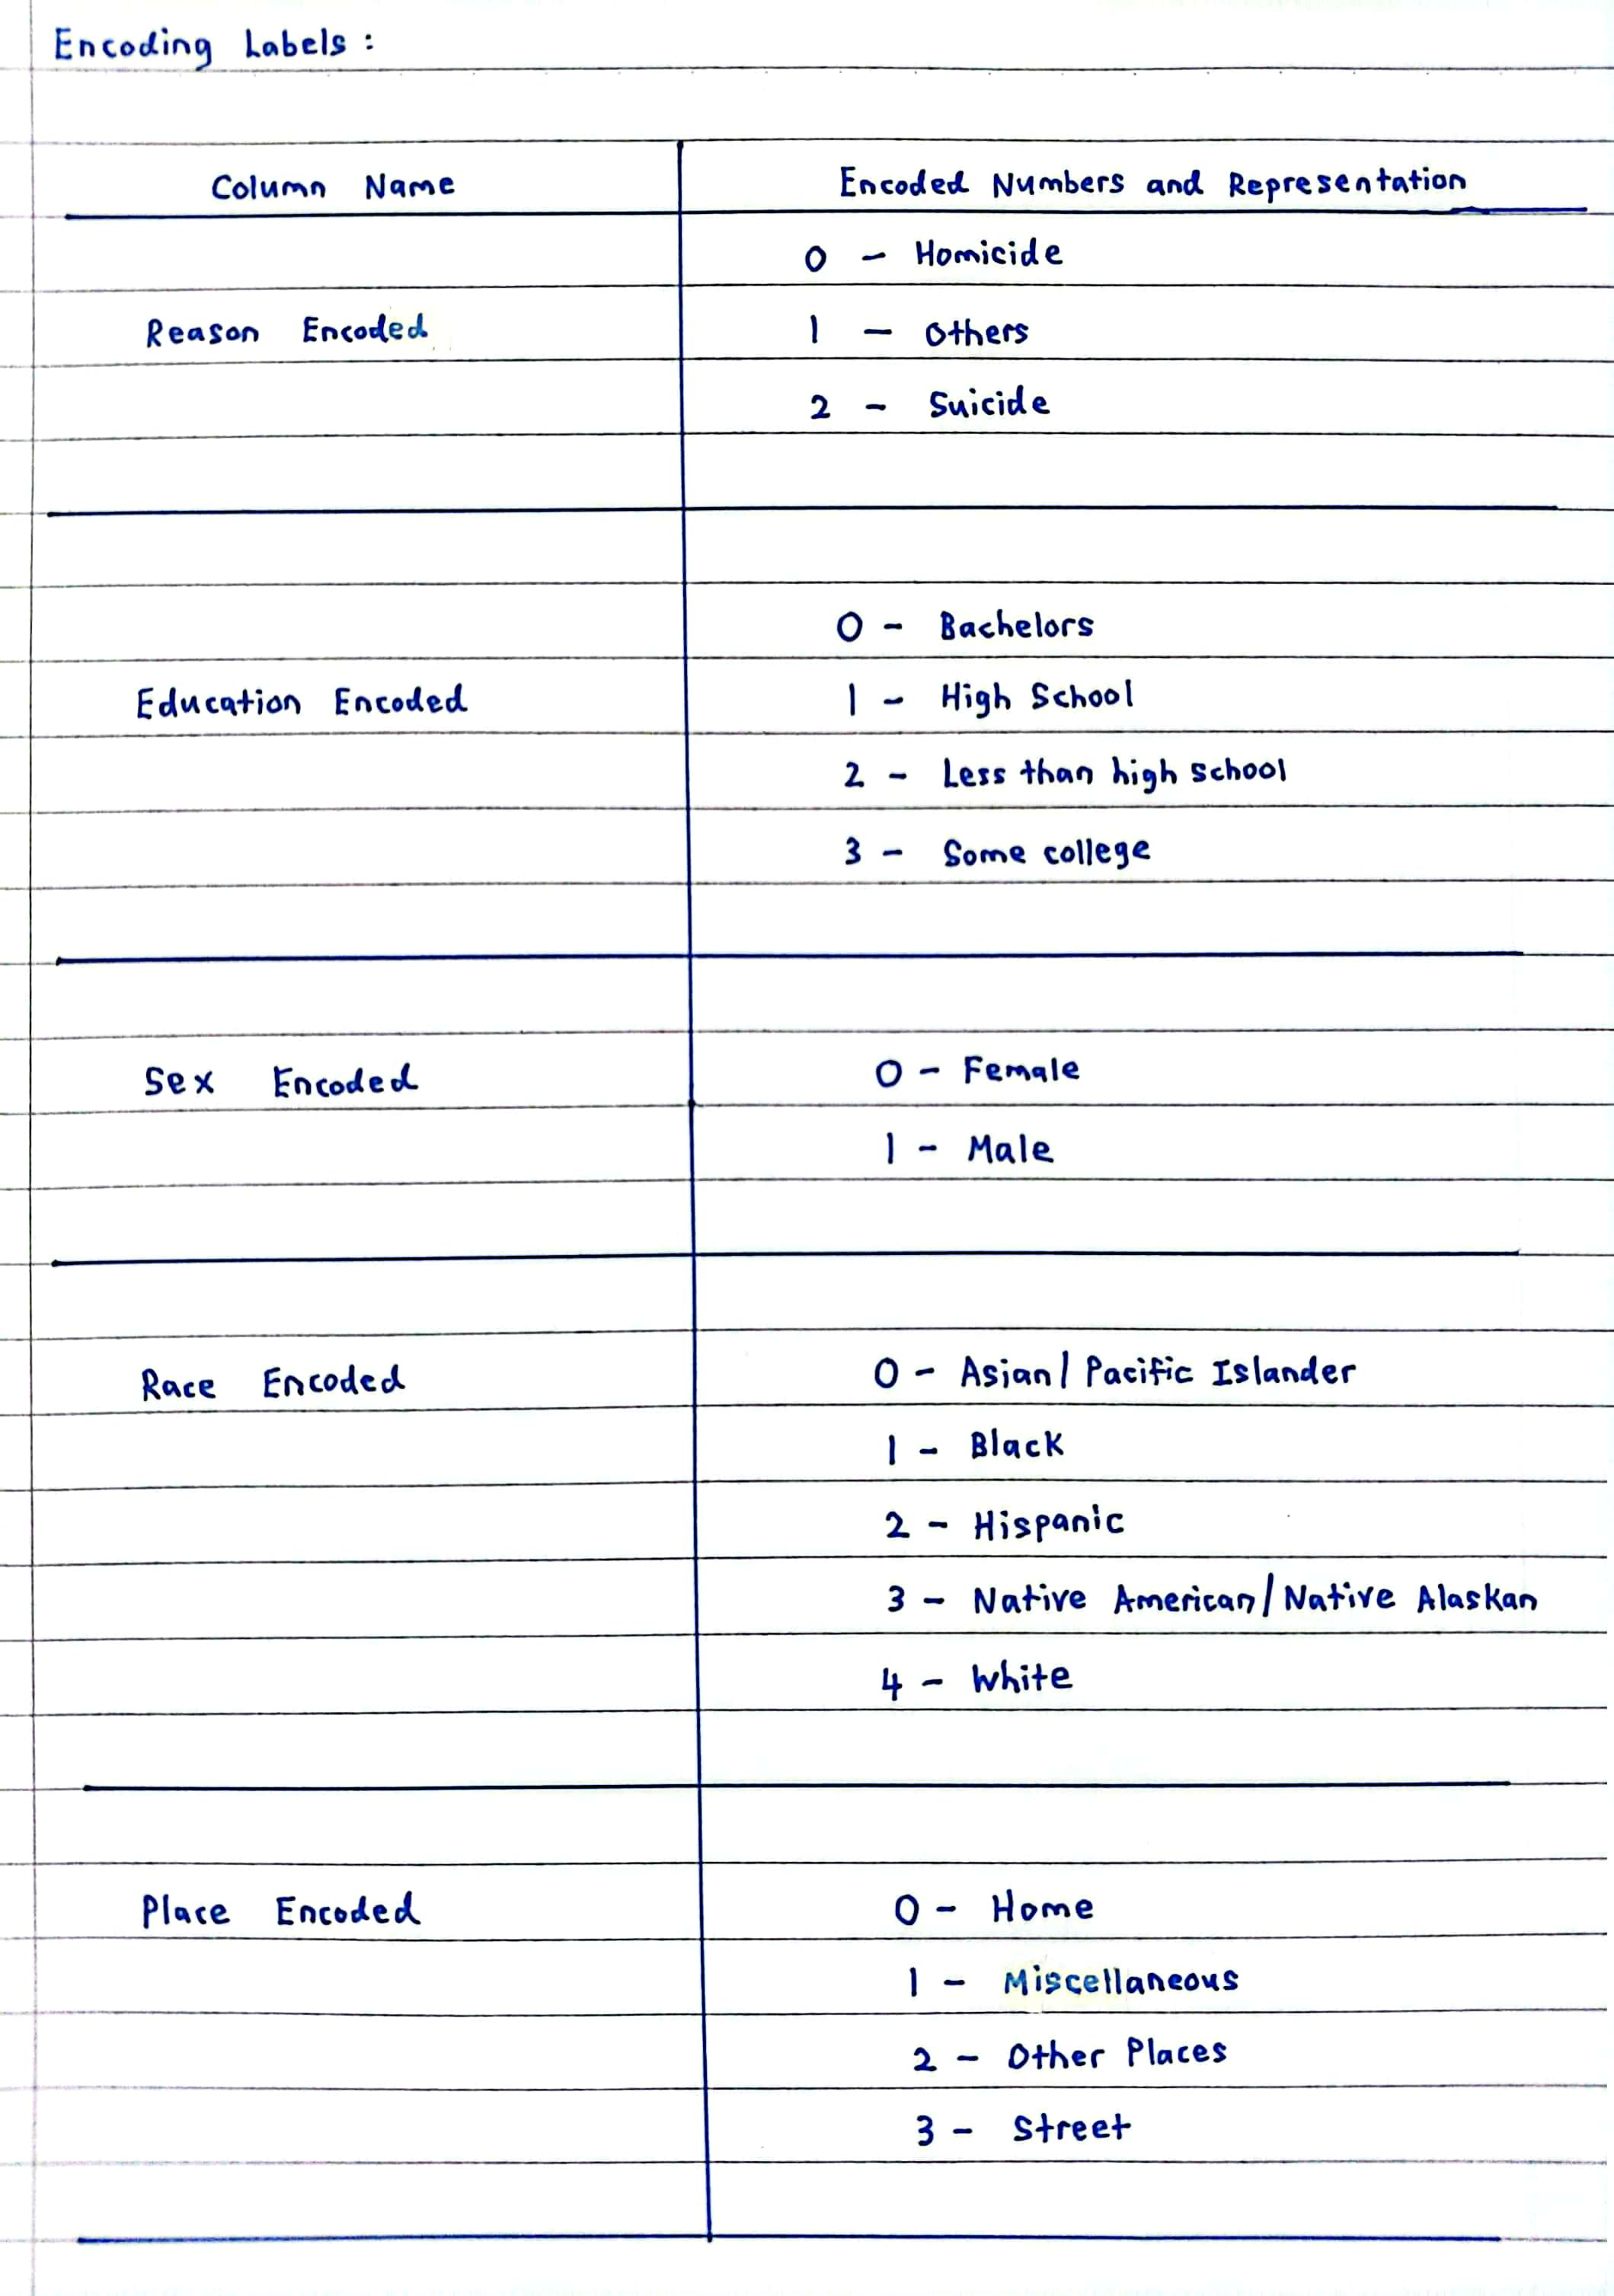

Next comes the modification of the date column. We will extract the date column and obtain the respective years and months of the dates accordingly using `dt.year` and `dt.month` from the `datetime` package.

In [ ]:
# Modifying the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df_modified = df.drop(columns=['Date'])
df_modified.head()

### Step 1.3: Extract the relevant features and target from the modified dataset with encodings

After encoding and modifying the Date column, we now have 'Reason Encoded' as the target and the rest of the columns - 'Year', 'Education Encoded', 'Sex Encoded', 'Age', 'Race Encoded', 'Place Encoded' and 'Police involvement' as the features. We can subset the features and the target columns into X and y respectively before performing the train-test-split.

In [ ]:
# Subsetting the df_modified dataset into features (X) and target (y) respectively
X = df_modified[['Year', 'Month', 'Education Encoded', 'Sex Encoded', 'Age',
                 'Race Encoded', 'Place Encoded', 'Police involvement']]
y = df_modified['Reason Encoded']

### Step 1.4: Performing the train-test-split on the dataset

We can subsequently perform the train-test-split on the dataset. We set the default train data to be 80% of the total number of rows of the dataset and the test data to be the remaining 20% of the total number of rows of the dataset. We set the random state of the train-test-split to be 0 (similar to setting seed value to be 0) in order to produce the same results each time the code is run for consistency.

In [ ]:
# Performing the train-test-split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

### Step 1.5: Fitting the training dataset and predicting the test dataset after fitting

First, we need to call the DecisionTreeClassifier from the scikit-learn.trees package. Afterwards, we can train the model using the results from the training set. After training the model, we can predict the target of the test dataset (y_pred) from the features of the test dataset (X_test).

In [ ]:
# Call the DecisionTreeClassifier from sklearn.trees
decision_tree_classifier = DecisionTreeClassifier()

# Train the Decision Tree model using the training dataset
decision_tree_classifier.fit(X_train, y_train)

# Predict the target (y_pred) of the test dataset from its features (X_test)
y_pred = decision_tree_classifier.predict(X_test)

### Step 1.6: Finding the original accuracy of the Decision Tree model (without any hyperparameter tuning or bagging/boosting methods)

We can now find the accuracy of the Decision Tree model implemented. This model is implemented without any hyperparameter tuning or bagging/boosting methods that can help improve its accuracy. Hence, the expected accuracy of the model might not be so high initially (perhaps around 75% to 80%), away from a more ideal accuracy of 90% or greater.

In [ ]:
# Finding the accuracy of the Decision Tree model implemented
model_accuracy = accuracy_score(y_pred, y_test)
model_accuracy

We managed to obtain an accuracy of around 74.5%, which is quite high for an unoptimized Decision Tree model. For about 4 data rows, the Decision Tree model can acccurately predict about 3 outcomes correctly, but 1 will be incorrectly classfied. We can hence optimize the Decision Tree model to improve its accuracy by using optimization techniques such as hyperparameter tuning and bagging/boosting.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 2: Perform Hyperparameter Tuning on Decision Tree

In this step, we will optimize the performance of our Decision Tree model by performing hyperparameter tuning. Hyperparameter tuning involves systematically searching for the best combination of hyperparameters that govern the behavior of the model. By adjusting these parameters, we aim to improve the model's accuracy and generalisation capability.

### Actions Required:
  1. Create a dictionary (param_grid) that contains all the possible criterion, max_Depth, min_samples_split and min_samples_leaf values.
  2. Perform the Grid Search Cross Validation on the Decision Tree model.
  3. Obtain the best values for each of the 4 parameters - criterion, max_depth, min_samples_split and min_samples_leaf.


### Step 2.1: Create dictionary param_grid for all respective values of the four parameters

We will define a grid of hyperparameters to explore, including options for the splitting criterion, maximum tree depth, minimum samples required to split a node, and more. By the end of this step, we should have identified better hyperparameters for our Decision Tree model.

Parameter 1: 'criterion' - This parameter specifies the function used to measure the quality of a split (how to determine the best way to split the data at each node)

Parameter 2: 'max_depth' - This parameter limits the maximum depth of the decision tree (the number of levels it can have from the root to the deepest leaf)

Parameter 3: 'min_samples_split' - This parameter controls the minimum number of samples required to split an internal node (for a node to consider creating further branches)

Parameter 4: 'min_samples_leaf' - This parameter defines the minimum number of samples required to be present in a leaf node (the final node of a branch)

In [ ]:
# Define the param_grid dictionary containing all the parameters considered and
# the respective values the parameters can take
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 6),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

**Note: max_depth argument is set to a maximum value 5 as having too large a value for max_depth will make the code in Step 2.2 run very slowly and hence, making the hyperparameter tuning model inefficient and time-consuming. Furthermore, having too many branches and levels will make the Decision Tree diagram very cluttered and hard to read when drawn in Step 4. **

### Step 2.2: Performing the Grid Search Cross Validation on the Decision Tree model

We will use `GridSearchCV` from the `sklearn.model_selection` module, which allows us to specify a grid of hyperparameters to search through. It will evaluate the model's performance using cross-validation for each combination of hyperparameters, ensuring that we find the most effective settings for our Decision Tree. This process not only helps in enhancing accuracy but also in preventing overfitting by identifying optimal model complexity.


In [ ]:
# Applying the Grid Search Cross Validation for the Decision Tree model
grid_search = GridSearchCV(estimator = decision_tree_classifier,
                           param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

### Step 2.3: Obtaining the optimal values for the 4 parameters for the re-construction of the Decision Tree model

After the Grid Search Cross Validation, we can then find the optimal values of the 4 parameters in order to improve the accuracy of the Decison Tree model when re-implemented in the next step. This can be done via the `grid_search.best_params` method.

In [ ]:
# Printing out the most optimal values of the hyperparameters for the Decision Tree model
print("Best Parameters: " , grid_search.best_params_)

After performing the Grid Search Cross Validation, we managed to find out that the best parameters for the Decision Tree model is where:

1) Criterion - Gini

2) Max Depth - 5

3) Min Samples Leaf - 3

4) Min Samples Split - 2

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 3: Re-implement the Decision Tree Model (with the most accurate hyperparameters)

In this step, we will create a new Decision Tree model using the better hyperparameters identified in the previous step. By leveraging these optimized parameters, we aim to enhance the model's accuracy and overall performance on the test dataset. After fitting the model to the training data, we will use it to make predictions on the test set and evaluate its accuracy.

### Actions Required:
  1. Re-implement the Decision Tree Classifier model using the optimized values of parameters from the hyperparameter tuning.
  2. Similar to Step 1.5, fitting the training dataset and predicting the test dataset (y_pred_optimised) from X_test.

### Step 3.1: Re-implementing the Decision Tree Classifier using the optimised values obtained from hyperparameter tuning

From Step 2.3, we have realised that the optimal parameters after hyperparameter tuning are the `criterion` of Gini, a `max_depth` of 5, `min_samples_leaf` of 3 and `min_samples_split` of 2. Hence. we should pass these arguments into the `DecisionTreeClassifier` for analysis before fitting, training and predicting.

In [ ]:
# Run the Decision Tree Classifier Model with the optimized parameter values as arguments
optimised_decision_tree = DecisionTreeClassifier(criterion = 'gini',
                                                 max_depth = 5,
                                                 min_samples_leaf = 3,
                                                 min_samples_split = 2,
                                                 random_state = 0)

### Step 3.2: Fitting the training dataset and predicting the test dataset

Similar to Step 1.5, we need to first fit the training dataset using the `optimised_decision_tree `. Afterwards, we then predict the testing dataset `y_pred_optimised` from the data of `X_test`. Subsequently, calculate the new optimised accuracy score `model_accuracy_optimised`. We should expect that the value of` model_accuracy_optimised` will be higher than the value of `model_accuracy` in Step 1.6 as now optimization via hyperparameter tuning is taken into account.

In [ ]:
# Similarly, perform fitting with the training data
optimised_decision_tree.fit(X_train, y_train)

# Similarly, perform prediction on the testing data
y_pred_optimised = optimised_decision_tree.predict(X_test)

# Similarly, perform accuracy score on the optimized Decision Tree model
model_accuracy_optimised = accuracy_score(y_pred_optimised, y_test)
model_accuracy_optimised

After optimization using hyperparameter tuning, our Decision Tree model accuracy has increased moderately by 8% from 74.4% in Step 1.6 before the optimization process to 82.5% after the hyperparameter tuning process. Now more than 4 in 5 data outcomes are predicted correctly under the hyperparameter tuned Decision Tree model.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 4: Construct the Decision Tree Diagram

Now that we have trained the model, we can visualize the structure of the Decision Tree. This helps us understand the decision-making process of the model and the features it considers important for making predictions. We will use the `plot_tree` function to create a diagram that illustrates the tree's splits and the conditions at each node.

### Actions Required:
  1. Extract out the feature names and class name from the cleaned dataset obtained before the implementation of the model.
  2. Set a relevant figure size and box dimensions before plotting the Decision Tree diagram.
  3. Plotting the Decision Tree diagram with the appropriate layout, scaling, information and depth.

### Step 4.1: Extracting the feature names and class name from the cleaned dataset

We first need to extract the feature and class names from the cleaned dataset as this will ensure clarity and sensibility when the Decision Tree diagram is being plotted for easy analysis.

The feature names are all the independent variables in the dataset - Year, Month, Education Encoded, Sex Encoded, Age, Race Encoded, Place Encoded and Police involvement. Reason Encoded should NOT be included in the feature names as Reason Encoded is a target variable, not a feature.

The class names are the relevent possible outcomes of the target varaiable, which is Reason Encoded. The possible outcomes include Homicide, Others and Suicide.

In [ ]:
# Extract the feature names from the cleaned dataset
feature_names = ['Year', 'Month', 'Education Encoded', 'Sex Encoded', 'Age',
                 'Race Encoded', 'Place Encoded', 'Police involvement']

# Include the relevent class names from the target variable of the dataset
class_names = ['Homicide', 'Others', 'Suicide']

### Step 4.2: Setting a relevant figure size and box dimensions before plotting Decision Tree

After trying and testing, we propose that a relevent figure size of the Decision Tree will be a length of 50 and a width of 20. This ensures that all the relevent nodes of the Decision Tree are plotted without any overlap and can be clearly seen in the figure.

Length should be set at a higher value than height as the Decision Tree grows exponentially, meaning that at a depth of 4, there will be around 16 nodes in the same level. Height of the tree will be 4 nodes tall while length of the tree will be 16 nodes long.

**NOTE: For the construction of the Decision Tree, we set the maximum depth to be 4 instead of 5 as a maximum depth of 5 will cause many nodes in the bottommost layer of the Decision Tree to overlap, hiding many important values at the leaf nodes. **

In [ ]:
# Plot the decision tree with a max depth of 4 and adjusted box dimensions
plt.figure(figsize = (50, 20), dpi = 200);

The `dpi` argument stands for Dots Per Inch and is a measurement of the resolution or clarity of an image, especially in digital graphics or printed media. Increasing the DPI value increases the number of pixels (or dots) per inch of the image, which makes the image clearer and more detailed. We set the DPI to a high value to increase the clarity of the words in the Decision Tree

### Step 4.3: Plotting the Decision Tree diagram with appropriate layouts, scaling and information

Decision Tree plotting can be performed using the `plot_tree` function, taking in the `class_names` and `feature_names` arguments in Step 4.1. Other arguments such as `impurity`, `proportion`, `fontsize` and `rounded` are included to adjust and improve the quality of the Decision Tree image in terms of both appearence and information contained in the nodes.

In [ ]:
# From Step 4.2
plt.figure(figsize = (50, 20), dpi = 200);

# Plot tree with custom scaling to make boxes taller and shorter in width
plot_tree(optimised_decision_tree,
          filled = True, rounded = True, fontsize = 16,
          class_names = class_names, feature_names = feature_names,
          impurity = False,     # Set impurity to False to hide Gini values
          max_depth = 4,        # Set max depth to 4 to hide the last layer
          proportion = False)   # Set proportion to False for uniform box sizes

# Adjust layout to reduce white space
plt.tight_layout()

# Display the Decision Tree diagram
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 5: Gauge the run-time of the Decision Tree Model and evaluate the model in terms of both accuracy and efficiency

Next, we will assess the efficiency of the optimised Decision Tree model by calculating the run-time taken to make predictions. This will give us insights into how well the model performs (accuracy) and its efficiency (run-time).

### Actions Required:
  1. Find the time taken for the training, fitting and prediction process for the Unoptimised Decision Tree Classifier.
  2. Find the extra time taken for the optimized hyparameter tuning process for the Optimised Decision Tree Classifier.
  3. Find the time taken for the training, fitting and prediction process for the Optimised Decision Tree Classifier.
  4. Find the total time taken for the Optimised Decision Tree Classifier process.


### Step 5.1: Finding the run-time of the training, fitting and prediction process for Unoptimised Decision Tree

To find the run-time of a particular process, we can use the `time.time` method from the time package twice, once at the start and once at the end. Afterwards, we can calculate the difference between the start and end values.

In [ ]:
# Assign start time of run-time process
start_time_one = time.time()

# Copy-Paste the code from Step 1.5 - Unoptimised Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

# Assign end time of run-time process
end_time_one = time.time()

# Calculate the difference between start time and end time
run_time_one = end_time_one - start_time_one

print("Unoptimised Decision Tree Model: ")
print(f"\nAccuracy: {model_accuracy}")
print(f"\nTotal Run Time: {run_time_one} seconds")

We observed that the total run-time for the unoptimised Decision Tree model is about 0.2 to 0.3 seconds, which is considered quite fast. This is expected as the unoptimized Decision Tree model does not take into account any optimization processes such as hyperparameter tuning. The accuracy of the model is about 0.75 as calculated in Step 1.6.

### Step 5.2: Finding the time taken for optimizing Decision Tree model via hyperparameter tuning

For the calculation of run-time via hyperparameter tuning, we need to measure the run-time of the GridSearchCV process in Step 2.2 as this is used to determine the optimised values of the various hyperparameters in the Decision Tree model.

In [ ]:
# Assign start time of run-time process
start_time_two = time.time()

# Copy-Paste the code from Step 2.2 - Hyperparameter Tuning via GridSearchCV
grid_search = GridSearchCV(estimator = decision_tree_classifier,
                           param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

# Assign end time of run-time process
end_time_two = time.time()

# Calculate the difference between start time and end time
run_time_two = end_time_two - start_time_two

print("Hyperparameter Tuning: ")
print(f"\nRun Time: {run_time_two} seconds")

The run-time for the hyperparameter tuning process turned out to be over 200 seconds, which is considered very long (more than 3 minutes). This is because time is needed to search for the best combination of parameter values for a given range of values of max_depth, min_sample_leaf and min_sample_split. There will be many iterations, leading to long run-times for the GridSearchCV process.

### Step 5.3: Finding the run-time of the training, fitting and prediction process for Optimised Decision Tree

Additionally, for the Optimised Decision Tree, we still need to find the run-time of the training, fitting and prediction process after the hyperparameter tuning, similar to Step 5.1 for the Unoptimised Decision Tree model.

In [ ]:
# Assign start time of run-time process
start_time_three = time.time()

# Copy-Paste the code from Steps 3.1 and 3.2 - Optimised Decision Tree Classifier
optimised_decision_tree = DecisionTreeClassifier(criterion = 'gini',
                                                 max_depth = 5,
                                                 min_samples_leaf = 3,
                                                 min_samples_split = 2,
                                                 random_state = 0)
optimised_decision_tree.fit(X_train, y_train)
y_pred_optimised = optimised_decision_tree.predict(X_test)

# Assign end time of run-time process
end_time_three = time.time()

# Calculate the difference between start time and end time
run_time_three = end_time_three - start_time_three

print("Fitting and Predicting: ")
print(f"\nRun Time: {run_time_three} seconds")

The run-time for the fitting and predicting process for the Optimised Decision Tree model is around 0.08 to 0.15 seconds, which is considerably faster compared to the same process used for the Unoptimised Decision Tree model.

### Step 5.4: Finding the total run-time taken for the Optimised Decision Tree model

For this step, to find the total run-time taken for the Optimised Decision Tree model, we can simply add the time taken for the Optimised Decision Tree model to perform the optimisation via hyperparameter tuning (Step 5.2) and the time taken for the same Optimised Decision Tree model to fit and predict (Step 5.3).

In [ ]:
# Finding the total run-time for Optimised Decision Tree model
print("Optimised Decision Tree Model: ")
print(f"\nAccuracy: {model_accuracy_optimised}")
print(f"\nTotal Run Time: {run_time_two + run_time_three} seconds")

The total run time of the Optimised Decision Tree model turned out to be around 240 seconds, which is basically the time taken for the hyperparameter tuning process via GridSearchCV process. The total run-time of the Optimised Decision Tree process is more than 1000 times slower compared to the Unoptimised Decision Tree model, which is highly concerning and inefficient.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 6: Apply Boosting/Bagging techniques to the Decision Tree model

In this step, we will enhance the performance of our Decision Tree model by implementing boosting and bagging techniques. Boosting helps to reduce bias and improve the accuracy of the model by combining multiple weak learners, while bagging aims to reduce variance by averaging the predictions of multiple models. We will utilise the `RandomForestClassifier` for bagging and `GradientBoostingClassifier` for boosting.


### Actions Required:

**Reduce Variance of model: Bagging**

Step 6.1: **Implement Bagging using Random Forest**

1. Create a Random Forest model with an arbitrary number of estimators.
2. Fit the model on the training dataset and predict the model on the test dataset.
3. Evaluate the Random Forest model in terms of accuracy.

**Reduce Bias of model: Boosting**

Step 6.2: **Implement Boosting using Gradient Boosting**

1. Create a Gradient Boosting model using an arbitrary number of estimators.
2. Fit the model on the training dataset and predict the model on the test dataset.
3. Evaluate the Gradient Boosting model in terms of accuracy.

###Step 6.1: Implementing Bagging using a Random Forest Classifier

First, we need to create a certain number of iterations, `n_iterations`, using a subset of the data rows in the dataset with replacement. We set the value of `n_iterations` to have a value of 10 for the Bagging process to iterate 10 times.

Repeating the Bagging process 10 times will cause the Decision Tree model to fit 10 times, predict 10 times and have the corresponding 10 accuracy values. Hence, we need to store all the accuracy values into a list called `accuracies_bagging`.

Afterwards, for every iteration, we need to create the Random Forest model using `RandomForestClassifier` with the number of estimators to be set a value of 50. (Meaning 50 rows of data will be extracted from the dataset for every bagging process). Subseuquently, the 50 randomly chosen datasets will undergo the fitting process (training data) and the prediction process (testing data) and its accuracy will be calculated. This process is repeated 10 times through the for loop. Each accuracy value will be appended to the `accuracies_bagging `list.

Lastly, we will take the average value of accuracy by taking the sum of accuracy values in the `accuracies_bagging` list over the number of elements in the `accuracies_bagging` list, which is 10. This accuracy value will hence be an estimate of the accuracy of the Random Forest model.

In [ ]:
# Set the number of bagging iterations and number of rows to sample
n_iterations = 10

# Initialize an empty list to store the results
accuracies_bagging = []

In [ ]:
# Perform bagging technique multiple times
for i in range(n_iterations):

    # Create the Random Forest model with appropriate parameters
    bagging_model = RandomForestClassifier(n_estimators = 50)

    # Fit the model on the training dataset
    bagging_model.fit(X_train, y_train)

    # Predict on the test dataset
    y_pred_rf_two = bagging_model.predict(X_test)

    # Calculate the accuracy
    model_accuracy_rf_two = accuracy_score(y_test, y_pred_rf_two)

    # Append the accuracy value obtained into the list
    accuracies_bagging.append(model_accuracy_rf_two)

In [ ]:
# Determining the overall accuracy of the Random Forest model
print(accuracies_bagging)
print(f"\nOverall Accuracy Of Random Forest Model: {sum(accuracies_bagging) / len(accuracies_bagging)}")

We observe that the accuracy of the Random Forest model is around 0.78 to 0.79, which is higher compared to the Unoptimised Decision Tree model but lower compared to the Optimised Decision Tree model using hyperparameter tuning.

The accuracy of the Random Forest model might differ from the value of 0.78 to 0.79 obtained depending on two factors, the number of iterations `n_iterations` of the Bagging process, as well as the value of the number of data rows that are selected for each iteration of the Bagging process `n_estimators`.

###Step 6.2: Implement Boosting using a Gradient Boosting Classifier
Next, we will create and evaluate a Gradient Boosting model. The steps are highly similar to the Random Forest model, just that there are additional parameters that need to be included in the `GradientBoostingClassifier` model that are not relevant in the `RandomForestClassifier` model.

The first parameter is the `learning_rate` - the learning rate controls the contribution of each base model to the overall model. It determines how much each new model, added in the boosting sequence, adjusts the previous model’s errors. Another parameter is the `max_depth` - controls the maximum depth of the individual decision trees used as weak learners.

The accuracies of the 10 iterations of the Boosting process is stored in a list, `accuracies_boosting`.

**NOTE: In boosting models, shallow trees (with a small max_depth, typically 1 to 5) are commonly used because each tree is focused on correcting errors from the previous ones. The trees are not meant to be complex or deep.**


In [ ]:
# Set the number of bagging iterations and number of rows to sample
n_iterations = 10

# Initialize an empty list to store the results
accuracies_boosting = []

In [ ]:
# Performing boosting technique multiple times
for i in range(n_iterations):

# Create the Gradient Boosting model with appropriate parameters
# Learning rate shrinks the contribution of each tree

    boosting_model = GradientBoostingClassifier(n_estimators = 50,
                                                learning_rate = 0.1,
                                                max_depth = 3)

    # Fit the model on the training dataset
    boosting_model.fit(X_train, y_train)

    # Predict on the test dataset
    y_pred_gb = boosting_model.predict(X_test)

    # Calculate the accuracy
    model_accuracy_gb = accuracy_score(y_test, y_pred_gb)
    accuracies_boosting.append(model_accuracy_gb)

In [ ]:
# Determining the overall accuracy of the Random Forest model
print(accuracies_boosting)
print(f"\nOverall Accuracy Of Gradient Boosting Model: {sum(accuracies_boosting) / len(accuracies_boosting)}")

We observe that the accuracy of the Gradient Boosting model is around 0.83 to 0.84, which is higher compared to the other three Decision Tree models - the unoptimised model, the optimised model via hyperparameter tuning and the optimised model via bagging.

Similarly, the accuracy of the Gradient Boosting model is dependent on three factors, the `n_estimators`, the `learning_rate` and the `max_depth` and might change depending on the values of these three parameters.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 7: Calculate the run-time and accuracy of the Decision Tree models for the Bagging and the Boosting Classifiers

After performing the Bagging and Boosting techniques on the Decision Tree model, it is now time to access and calculate the run-time of these two optimisation techniques. Re-calculating the run-time and accuracy allows us to verify whether our optimisations such as hyperparameter tuning, bagging, boosting has truly improved the model in a meaningful way.



### Actions Required:
  1. Calculate the run-time and accuracy for the Bagging process.
  2. Calculate the run-time and accuracy for the Boosting process.
  3. Compare the run-time and accuracy for the 4 Decision Tree models respectively

### Step 7.1: Calculate the run-time and accuracy for the Bagging process

Similar to Step 5, we can calculate the run-time of the Bagging process using `time.time` from the time package. The run-time calculated includes the 10 iterations of the Bagging process, coupled with the fitting and training steps of the Decision Tree model.

In [ ]:
# Start timing for the Random Forest model
start_time_rf = time.time()

# Copy-paste the Bagging Process from Step 6.1
for i in range(n_iterations):
    bagging_model = RandomForestClassifier(n_estimators = 50)
    bagging_model.fit(X_train, y_train)
    y_pred_rf_two = bagging_model.predict(X_test)

# End timing for the Random Forest model
end_time_rf = time.time()

# Calculate the difference between start time and end time
run_time_rf = end_time_rf - start_time_rf

In [ ]:
# Display the results
print("Random Forest Model: ")
print(f"\nAccuracy: {sum(accuracies_bagging) / len(accuracies_bagging)}")
print(f"\nTotal Run Time: {run_time_rf} seconds")

The total run-time of the Random Forest model is around 40 to 45 seconds, which is significantly faster than the Optimised Decision Tree model using hyperparameter tuning, which is over 200 seconds. However, the run-time of the Random Forest model is slower compared to the Unoptimised Decision Tree model, which is 0.2 to 0.3 seconds.

### Step 7.2: Calculate the run-time and accuracy for the Boosting process

Also, we can calculate the run-time of the Boosting process using time.time from the time package. Similar to the Bagging process, we calculate the run-time for the 10 iterations of the Boosting process, coupled with the fitting and training steps of the Decision Tree model.

In [ ]:
# Start timing for the Random Forest model
start_time_gb = time.time()

# Copy-paste the Boosting Process from Step 6.2
for i in range(n_iterations):
    boosting_model = GradientBoostingClassifier(n_estimators = 50,
                                                learning_rate = 0.1,
                                                max_depth = 3)
    boosting_model.fit(X_train, y_train)
    y_pred_gb = boosting_model.predict(X_test)

# End timing for the Random Forest model
end_time_gb = time.time()

# Calculate the difference between start time and end time
run_time_gb = end_time_gb - start_time_gb

In [ ]:
# Display the results
print("Gradient Boosting Model: ")
print(f"\nAccuracy: {sum(accuracies_boosting) / len(accuracies_boosting)}")
print(f"\nTotal Run Time: {run_time_gb} seconds")

For the Gradient Boosting model, the total run-time is around 90 to 100 seconds, which is slower (about 2 times slower) compared to its Bagging counterpart. However, it is still significantly faster (about 3 to 4 times faster) compared to the optimised Decision Tree model using hyperparameter tuning.

### Step 7.3: Compare the run-time and accuracy for the 4 models respectively

The image below shows the run-time and the accuracies of the 4 different models that we have used for the Decision Tree process:

1. Unoptimised Decision Tree model

2. Optimised Decision Tree model via Hyperparameter Tuning

3. Optimised Decision Tree model via Bagging

4. Optimised Decision Tree model via Boosting

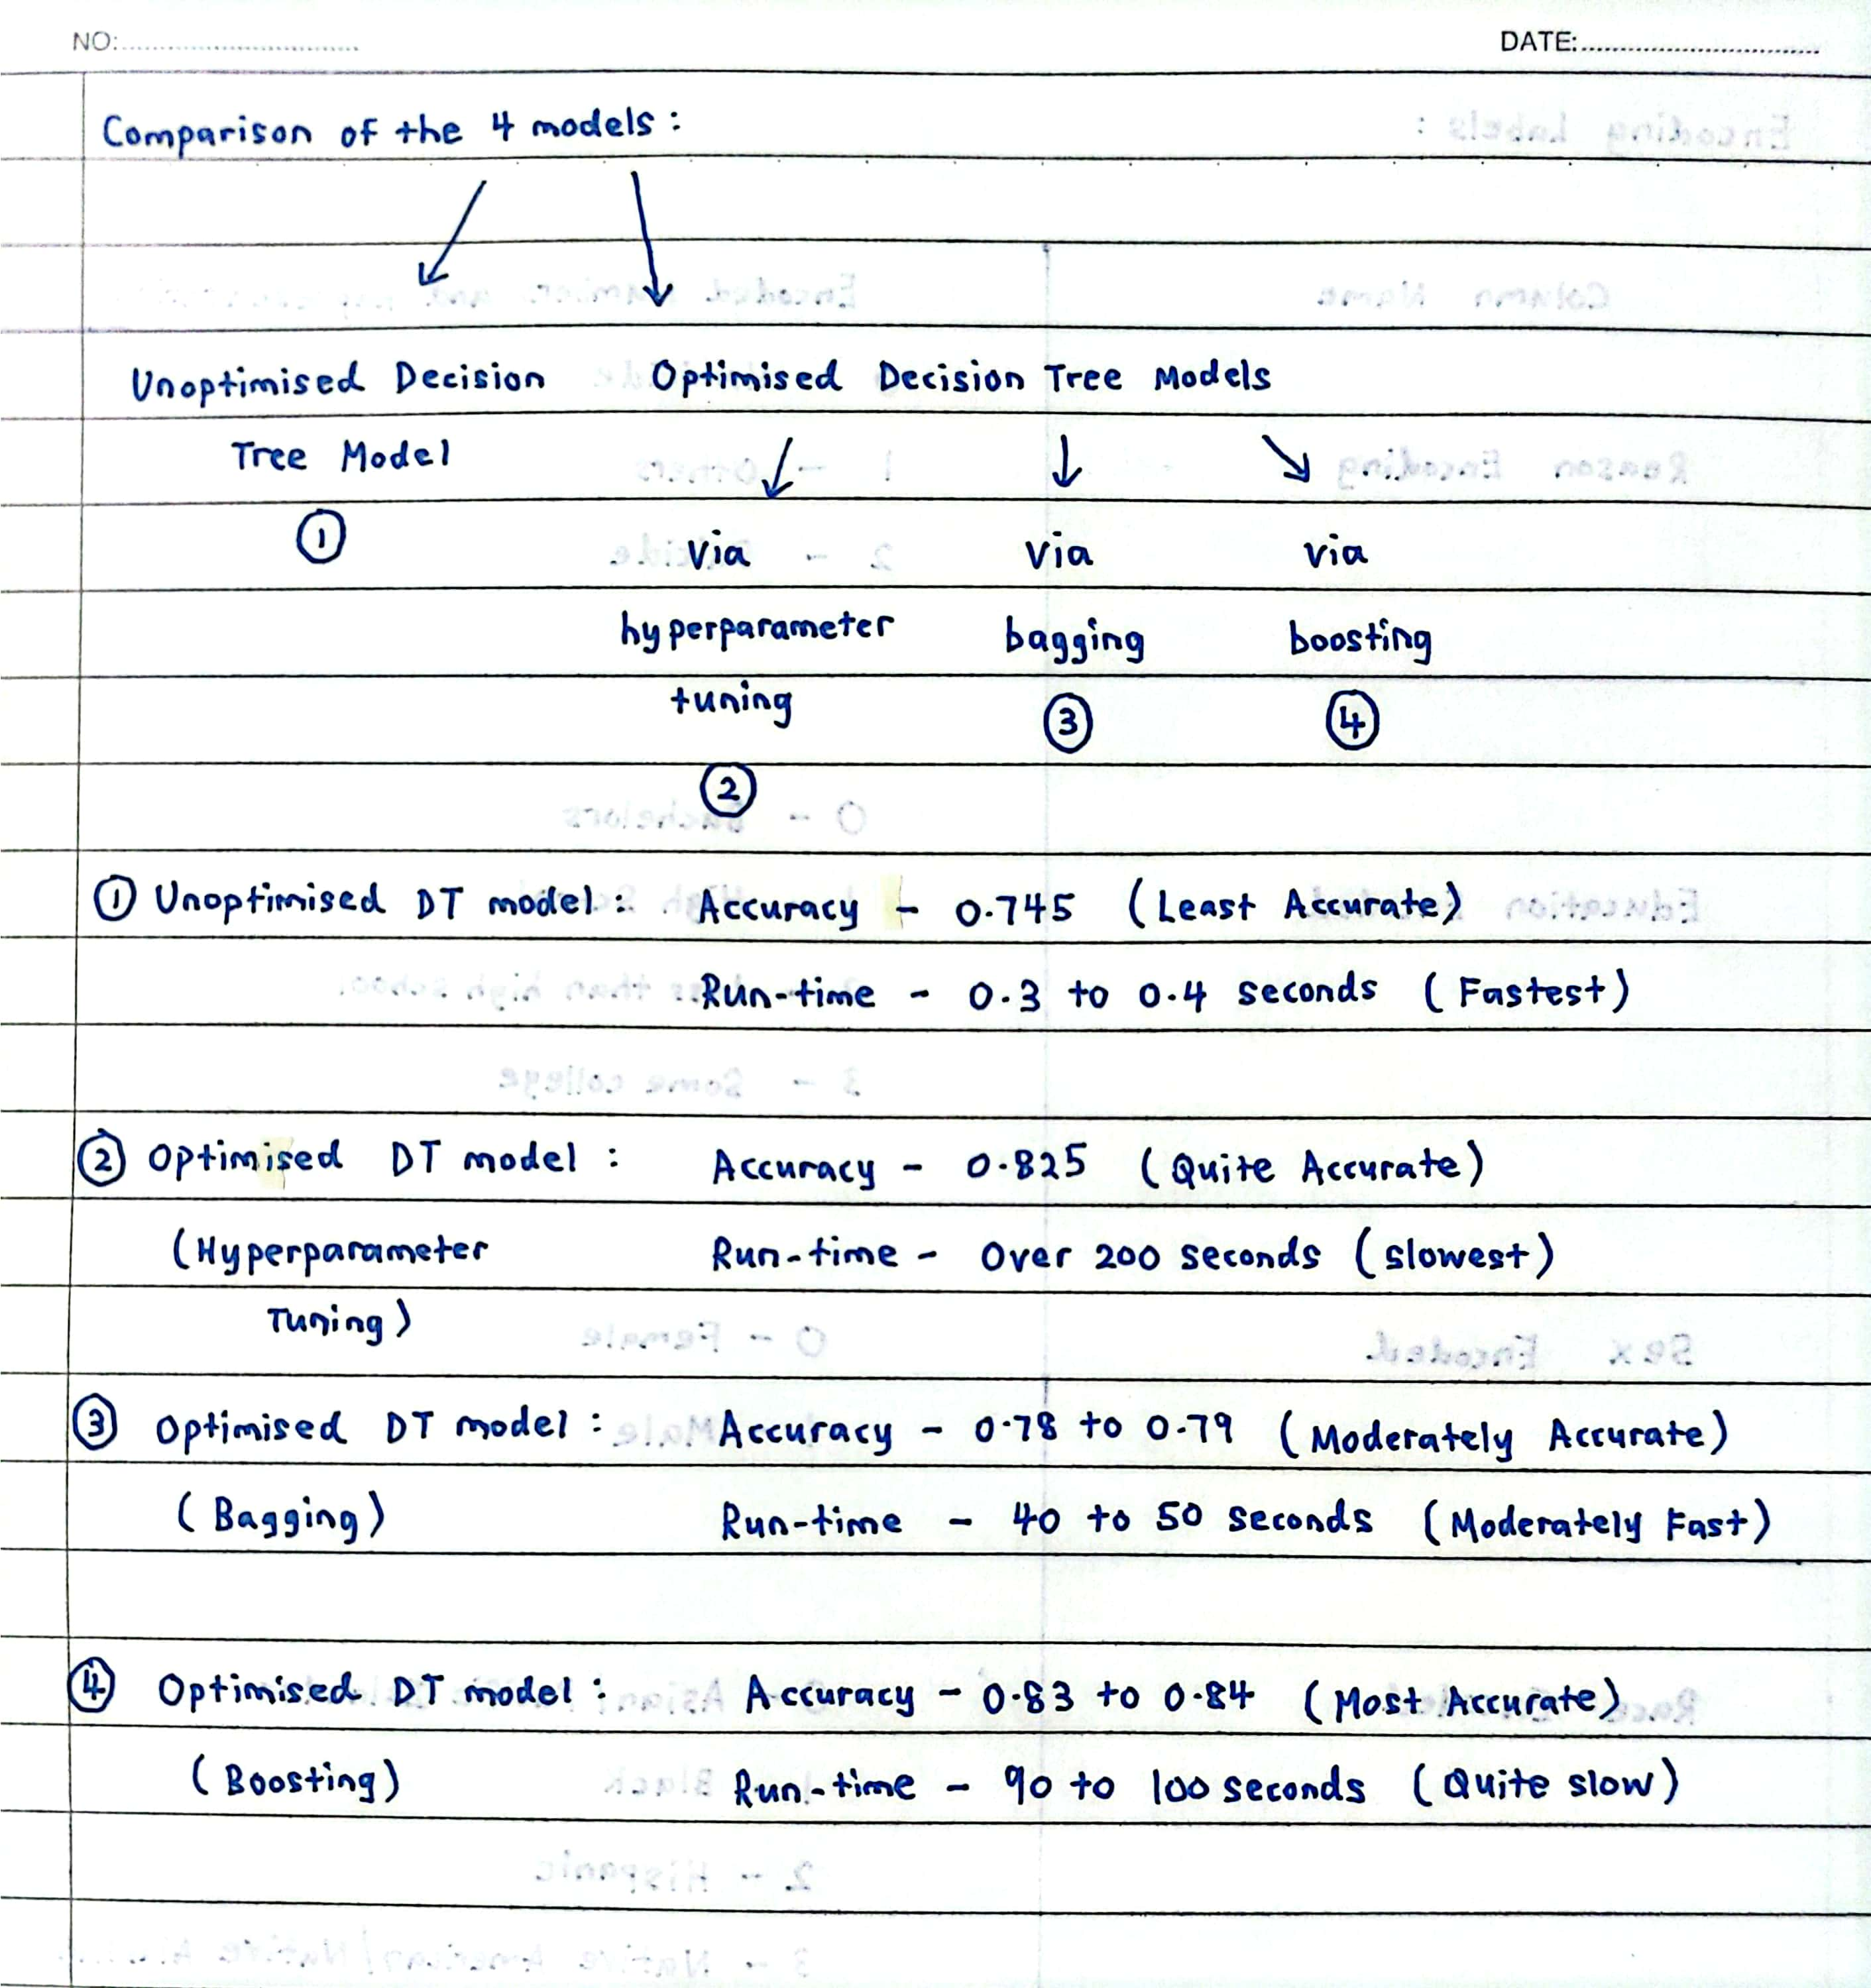

Among the four models implemented, we observe that in terms of accuracy, Optimised Decision Tree model via Boosting and Optimised Decision Tree model via Hyperparameter tuning have the highest acuracies of over 0.8. (0.835 and 0.825 respectively). Optimised Decision Tree model via Bagging has a slightly lower accuracy of around 0.78 to 0.79. Meanwhile, the Unoptimised Decision Tree's accuracy is the lowest at around 0.745.

As for the run-times, Unoptimised Decision Tree models have the fastest run-time of less than 0.5 seconds. This comes before Optimised Decision Tree model via Bagging, which takes arounf 40 to 50 seconds. Optimised Decision Tree model via Boosting takes roughly 90 to 100 seconds. Optimised Decision Tree model via Hyperparameter Tuning takes the longest, over 200 seconds.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 8: Evaluation of the 4 models, choosing the best model and re-constructing the decision tree diagram

### Actions Required:
  1. Perform and in-depth evaluation of the 4 models (cost-benefit analysis)
  2. Choosing the best model to use for Decision Tree and explain why
  3. Re-constructing the Decision Tree model from Part 2
  4. Conclusion of Decision Tree model before diving into Logistic Regression


### Step 8.1: Perform in-depth analysis and evaluation of 4 models through a cost-benefit analysis.

We have evaluated the performance of various models, including the Unoptimised Decision Tree model, Optimized Decision Tree via Hyperparameter Tuning, Random Forest which is the bagging technique and Gradient Boosting which is the boosting technique by focusing on both their accuracy and run time.

The Optimized Decision Tree achieved an accuracy of approximately 82.5%, a significant improvement over its unoptimized counterpart, which had an accuracy of about 74.5%. However, this improvement came at a substantial computational cost, with a run time of around 240 seconds due to hyperparameter tuning via GridSearchCV.

In contrast, the Random Forest model demonstrated comparable accuracy at approximately 78.5% (although slightly lower than hyperparameter tuning), but with a reduced run time of under 50 seconds. This efficiency highlights the effectiveness of bagging techniques in delivering robust performance without incurring excessive computational demands.

The Gradient Boosting model outperformed both the Decision Tree and Random Forest in accuracy, reaching about 83.5%. However, its run time of about 90 to 100 seconds seconds indicates a significant computational burden compared to the Random Forest model.

Overall, the findings illustrate a critical trade-off between accuracy and computational efficiency. While the Gradient Boosting model provided the highest accuracy, the Random Forest model offers a strong balance between performance and speed, making it a more practical choice in scenarios where quick responses are essential. The Optimized Decision Tree, despite its enhanced accuracy, suffers from inefficiency, underscoring the need to consider both model performance and resource usage when selecting algorithms for real-world applications.

Consider plotting a dual axis graph of accuracy and efficiency below to illustrate the results in a pictorial form:

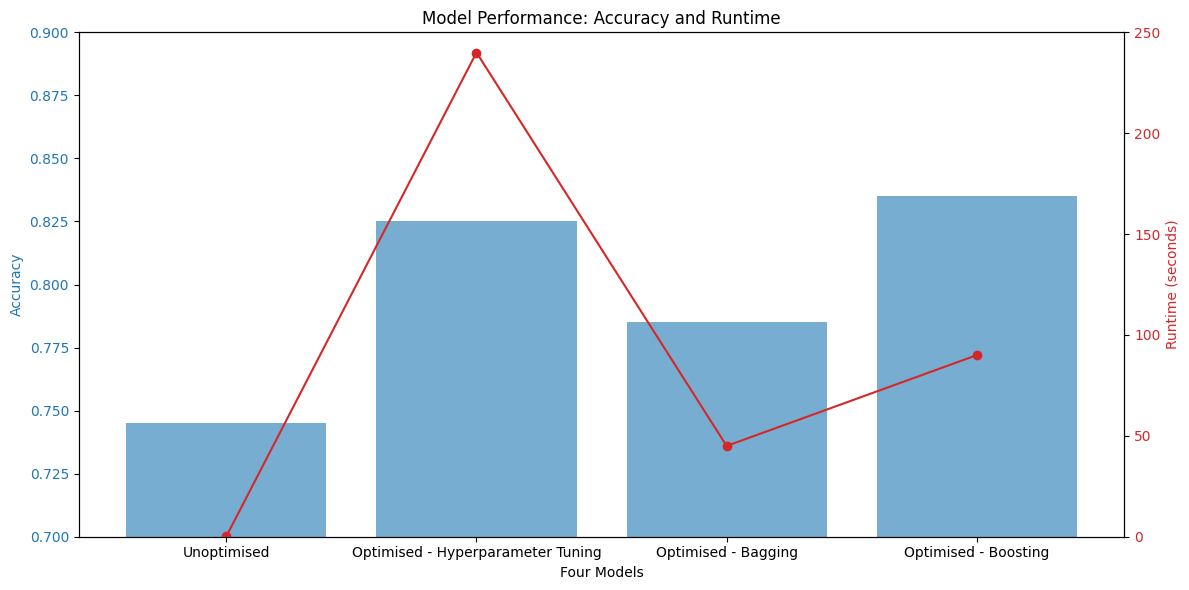

In [83]:
import matplotlib.pyplot as plt

# Example data for the four models
four_models = ['Unoptimised', 'Optimised - Hyperparameter Tuning',
               'Optimised - Bagging', 'Optimised - Boosting']

# Replace with actual accuracies
accuracies = [0.745, 0.825, 0.785, 0.835]

# Replace with actual runtimes in seconds
runtimes = [0.2, 240, 45, 90]

# Increase the width of the figure + create first axis on accuracy
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the four models on the x-axis
ax1.set_xlabel('Four Models')

# Plot accuracy on the primary y-axis
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.bar(four_models, accuracies, color='tab:blue', alpha = 0.6, label = 'Accuracy')
ax1.tick_params(axis = 'y', labelcolor = 'tab:blue')

# Set y-axis limits for accuracy (starting from 0.7)
ax1.set_ylim(0.7, 0.9)

# Create the second axis on run-time
ax2 = ax1.twinx()

# Plot run-time on the secondary y-axis
ax2.set_ylabel('Runtime (seconds)', color='tab:red')
ax2.plot(four_models, runtimes, color='tab:red', marker='o', label='Runtime')
ax2.tick_params(axis = 'y', labelcolor = 'tab:red')

# Set y-axis limits for runtime (starting from 0)
ax2.set_ylim(0, 250)

# Add a title and show the plot
plt.title('Model Performance: Accuracy and Runtime')
fig.tight_layout()
plt.show()

### Step 8.2: Choosing the best model to use for the Decision Tree

**Boosting emerged as the best model to us based on the following considerations.**

Based on the accuracy, the Gradient Boosting model achieved the highest accuracy of approximately 83.5%, which indicates its effectiveness in correctly predicting outcomes.
The Optimized Decision Tree with hyperparameter tuning, performed well but still lower at 82.5% while the Random Forest had lower accuracy of 78.5% compared to Gradient Boosting. The primary goal of our analysis is to maximize prediction accuracy, and Boosting has consistently demonstrated its ability to achieve this objective, having the highest accuracy.

Though runtime of Random Forest is about 40 to 50 seconds while Gradient Boosting requires more computational resources, with a run time of approximately 90 to 100 seconds, this is a reasonable trade-off for the accuracy gained. In domains where precision is critical, achieving the most accurate predictions justifies a longer computational time. Moreover, compared to Optimised Decision Tree with hyperparameter tuning with runtime over 200 seconds, the Gradient Boosting is more than twice faster and efficient. Thus, the efficiency of Gradient Boosting in producing highly accurate predictions outweighs the drawbacks associated with its increased run time.

Lastly, Boosting is able to mitigate overfitting through its iterative learning process. By sequentially learning from previous errors, the model becomes more robust against fitting noise in the training data. Although the Optimized Decision Tree has enhanced accuracy due to hyperparameter tuning, it may still be susceptible to overfitting without the iterative corrections provided by Boosting. Boosting models, particularly Gradient Boosting, have shown a remarkable ability to generalise to unseen data. This characteristic is crucial for ensuring that the model performs well in real-world applications, where data distributions may vary. While Random Forests provide good generalization, Boosting often excels in producing more reliable predictions, especially in cases where the underlying data relationships are complex.

In summary, the selection of the Gradient Boosting model as the optimal choice for our Decision Tree analysis is based on its superior predictive accuracy, acceptable trade-off in computational complexity, and effective regularisation capabilities that reduce the risk of overfitting. These characteristics highlight the model's efficacy and computational efficiency in producing high-quality predictions, rendering it the most suitable algorithm for our analytical objectives.





### Step 8.3: Re-constructing the Decision Tree model using (Chosen Model)

The final step involves revisiting the Decision Tree model, this time visualising it after optimisation and re-calculating its performance metrics, such as accuracy and run-time. Visualising the decision tree helps in understanding the structure of the model, including the decision rules, node splits, and the overall complexity of the tree.

Overview of the entire Boosting Process:

NOTE: Run-time will be increased a little than before as we now set `max_depth ` argument to 4 instead of 3 for the purpose of constructing the Decision Tree later on. Having a larger `max_depth` will increase the run-time of each iteration of the Boosting process, leading to an increase in the total run-time of 10 iterations of the Boosting process.

In [80]:
# Boosting Model (The Model We Have Chosen)
# Full Code of the Boosting Model + Construct Decision Tree

# Set a specific number of iterations
n_iterations = 10

# Initialize empty list to store the results
accuracies_boosting = []

# Start timing
start_time = time.time()

# Performing boosting technique multiple times
for i in range(n_iterations):

    # Create the Gradient Boosting model with appropriate parameters
    boosting_model = GradientBoostingClassifier(n_estimators = 50,
                                                learning_rate = 0.1,
                                                max_depth = 4)

    # Fit the model on the training dataset
    boosting_model.fit(X_train, y_train)

    # Predict on the test dataset
    y_pred_gb = boosting_model.predict(X_test)

    # Calculate the accuracy
    model_accuracy_gb = accuracy_score(y_test, y_pred_gb)
    accuracies_boosting.append(model_accuracy_gb)

# End timing
end_time = time.time()

# Calculate the total run-time of the 10 iterations
total_runtime = end_time - start_time

# Determine the overall accuracy of the Gradient Boosting model
average_accuracy = sum(accuracies_boosting) / len(accuracies_boosting)

# Determine the average runtime (runtime for each iteration)
average_runtime = total_runtime / len(accuracies_boosting)

print("Overall Summary Of Gradient Boosting Model: ")
print(f"\nOverall Accuracy: {average_accuracy}")
print(f"\nTotal Runtime: {total_runtime} seconds")
print(f"\nAverage Runtime: {average_runtime} seconds")

Overall Summary Of Gradient Boosting Model: 

Overall Accuracy: 0.8299620733249051

Total Runtime: 108.15867257118225 seconds

Average Runtime: 10.815867257118224 seconds


Plotting of the Decision Tree diagram from the Boosting Process:

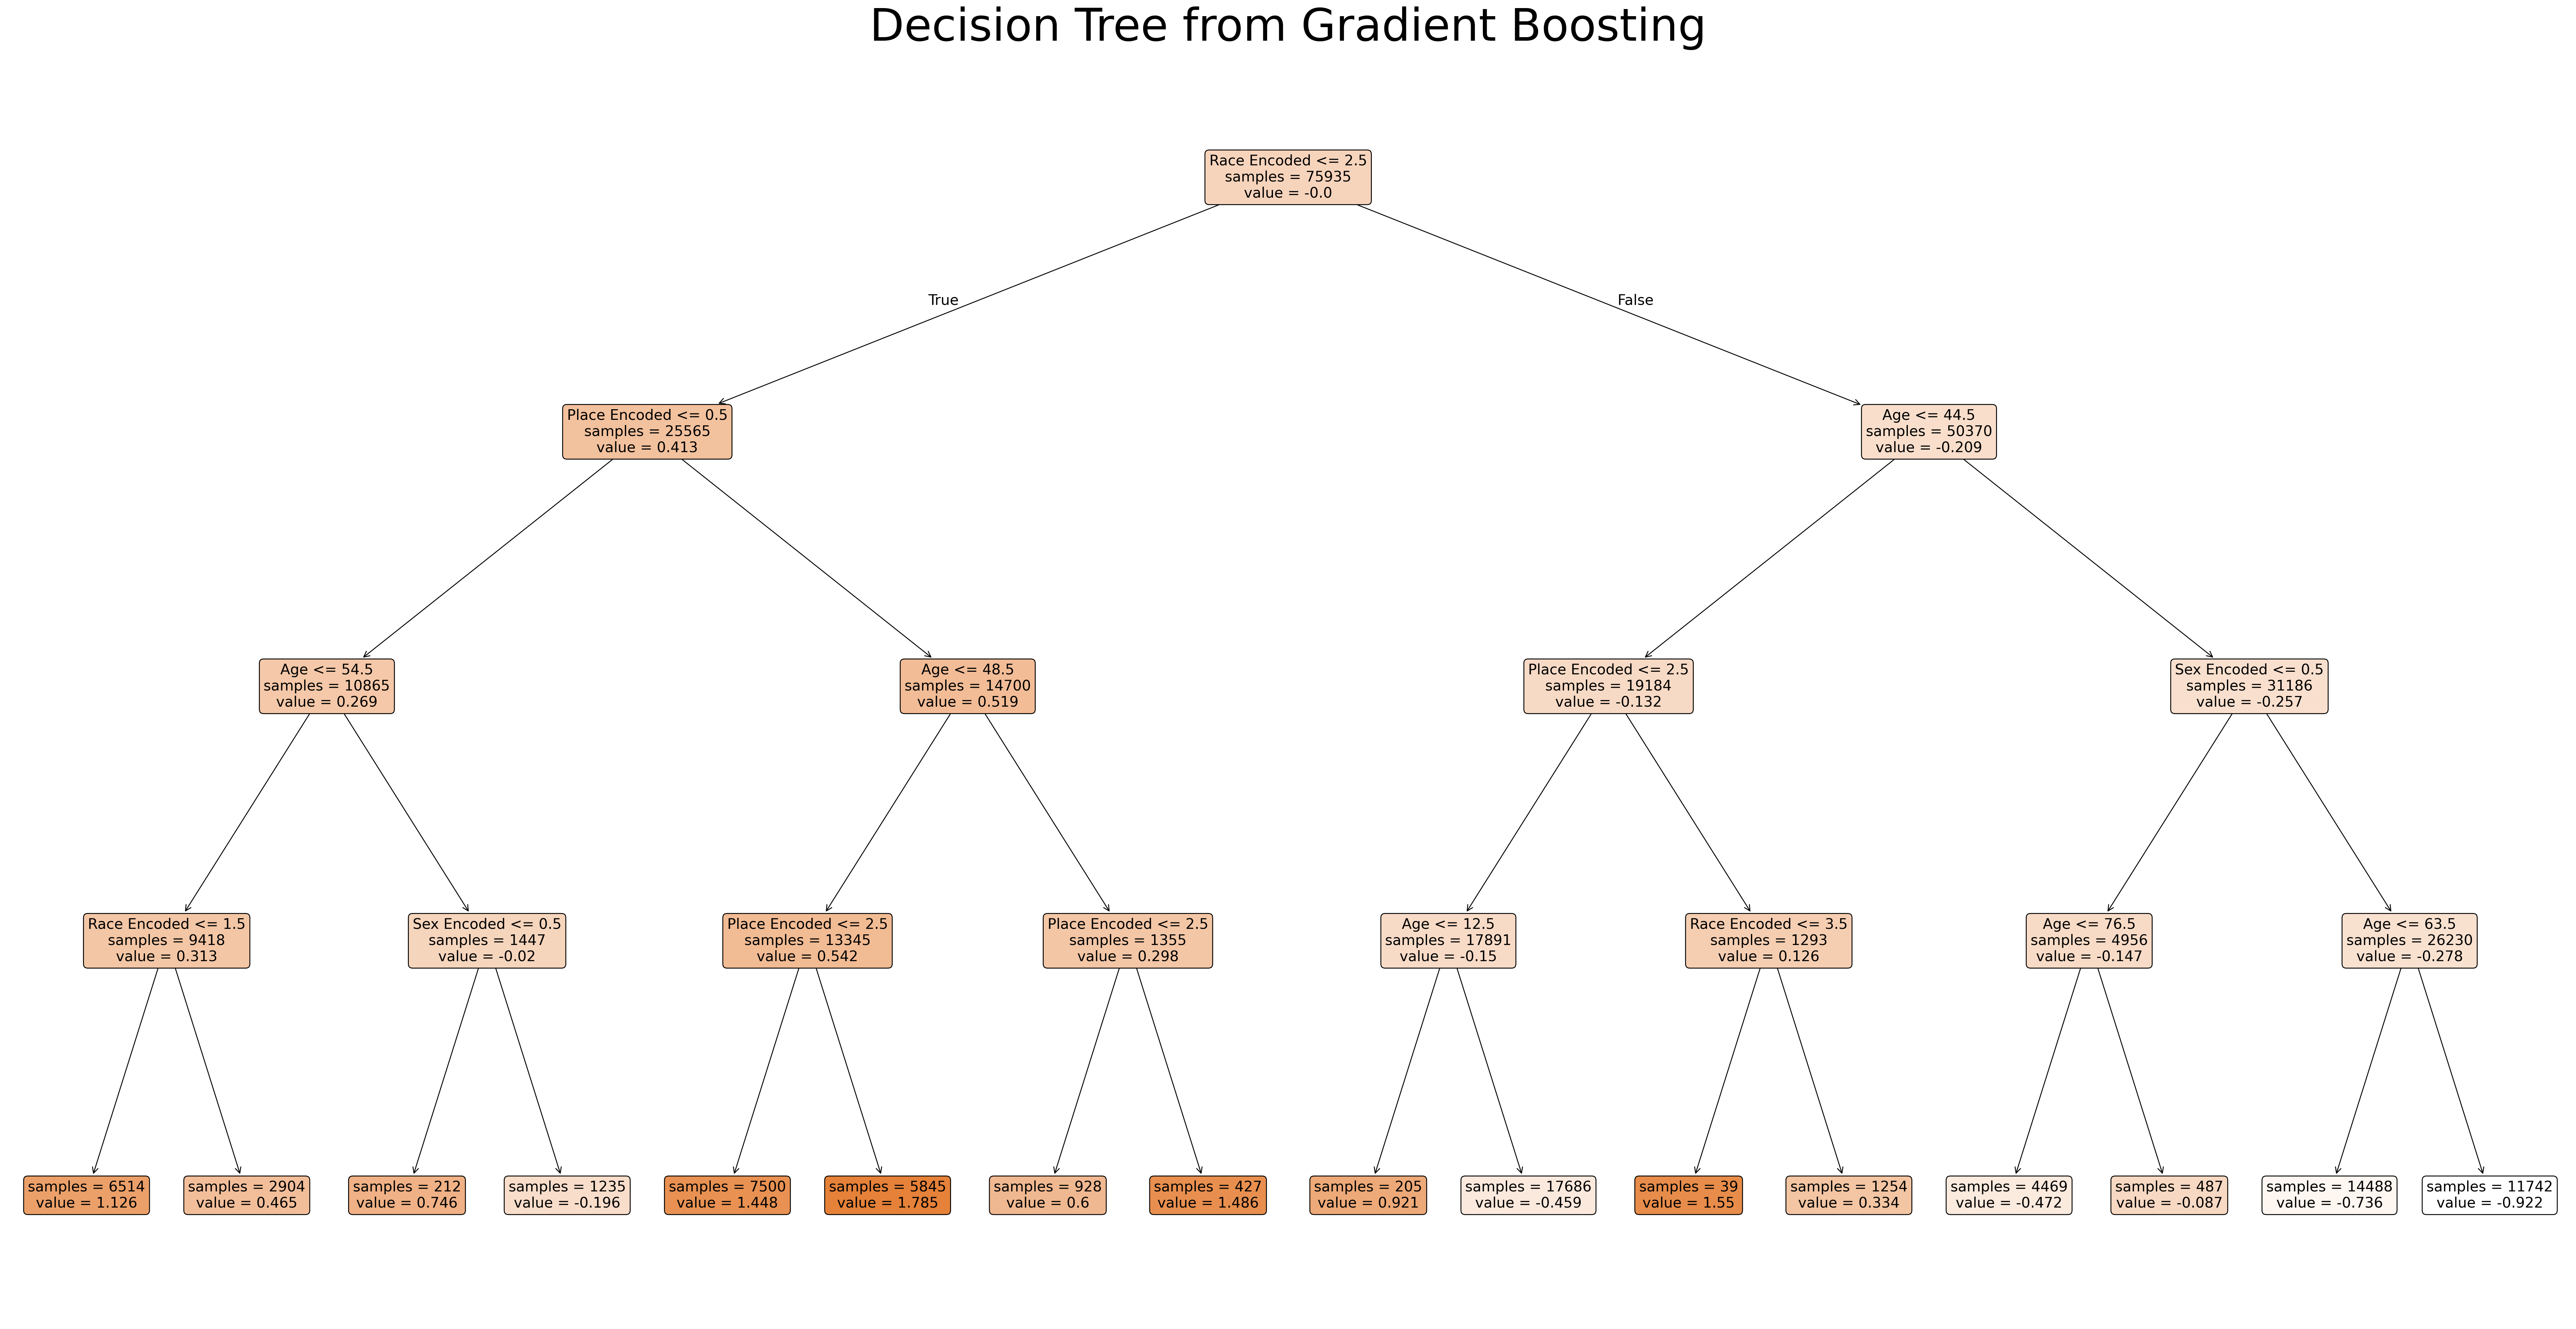

In [87]:
# Plotting the decision tree via Boosting

# First tree from the first boosting stage
decision_tree_subset = boosting_model.estimators_[0, 0]

# Set the figure size to the appropriate dimensions
plt.figure(figsize = (40, 20), dpi = 200);

# Plot tree with custom scaling to make boxes taller and shorter in width
plot_tree(decision_tree_subset,
          filled = True, rounded = True, fontsize = 16, label = "all",
          class_names = class_names, feature_names = feature_names,
          impurity = False, max_depth = 4, proportion = False)

# Adjust layout to reduce white space
plt.tight_layout()

# Display the Decision Tree diagram
plt.title("Decision Tree from Gradient Boosting", fontsize = 50)
plt.show()